#1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

#파이토치 시작하기

파이토치 시작하기

In [37]:
import torch 

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두개 만들고 행으로 병합, 열로 병합


In [38]:
X=torch.rand(4,3)
Y=torch.rand(4,3)
###행으로 병합 코드
output1 = torch.cat([X,Y], dim=1)
###열로 병합 코드
output2 = torch.cat([X,Y], dim=0)

In [39]:
output1

tensor([[0.7778, 0.5955, 0.6730, 0.2993, 0.1890, 0.2176],
        [0.2106, 0.4253, 0.0409, 0.1272, 0.8436, 0.3693],
        [0.6353, 0.2254, 0.2760, 0.3327, 0.4761, 0.0753],
        [0.9409, 0.4973, 0.3102, 0.1989, 0.6071, 0.9594]])

In [40]:
output2

tensor([[0.7778, 0.5955, 0.6730],
        [0.2106, 0.4253, 0.0409],
        [0.6353, 0.2254, 0.2760],
        [0.9409, 0.4973, 0.3102],
        [0.2993, 0.1890, 0.2176],
        [0.1272, 0.8436, 0.3693],
        [0.3327, 0.4761, 0.0753],
        [0.1989, 0.6071, 0.9594]])

linear regression implementation from scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [41]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [43]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [44]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.9521, -0.0707]) 
label: tensor([8.4672])


In [45]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [46]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.9378,  0.0623],
        [-0.3598, -0.7683],
        [ 0.7092,  1.8203],
        [-2.1223,  0.0938],
        [ 0.8688, -0.0641],
        [-0.9101, -0.1930],
        [ 0.7518, -2.8335],
        [-0.7925, -0.2059],
        [ 0.7496, -0.3208],
        [-0.1505,  0.7312],
        [-0.2593,  0.4279],
        [-0.5319, -1.0986],
        [-1.2006, -0.5351],
        [ 0.1387,  0.9253],
        [-0.8088,  0.1533],
        [-0.6447, -0.5163],
        [-1.5427, -0.4398],
        [-1.3784,  0.1172],
        [-2.5059,  0.4342],
        [-1.0740, -1.7042]]) 
 tensor([[ 8.2290],
        [ 5.5734],
        [ 4.8879],
        [-1.0028],
        [ 8.1876],
        [ 3.0593],
        [11.9888],
        [ 3.4319],
        [ 8.2219],
        [ 3.9560],
        [ 4.0879],
        [ 5.5417],
        [ 2.7197],
        [ 4.5623],
        [ 2.8365],
        [ 4.3421],
        [ 1.5394],
        [ 1.1602],
        [-2.6747],
        [ 4.8247]])


In [47]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [48]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X,w) + b
    ###lr func 코드 완성하기

In [49]:
def squared_loss(y_hat, y):  
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
    ###loss function 직접 짜보기

In [50]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
      for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
        ###반복문으로 채워넣기

In [95]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

w1_val = []
w2_val = []
b_val = []
l1_val = []
l2_val = []


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b), y) 
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w,b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        
        w1_val.append(w.tolist()[0])
        w2_val.append(w.tolist()[1])
        b_val.append(b.tolist())
        l1_val.append(train_l[0].mean())
        l2_val.append(train_l[1].mean())

        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000052


In [96]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0005, -0.0002], grad_fn=<SubBackward0>)
error in estimating b: tensor([-0.0001], grad_fn=<RsubBackward1>)


+cost graph 그리기 (x축 w, y축 loss)

In [84]:
! python -m pip uninstall matplotlib
! pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.1.3
Uninstalling matplotlib-3.1.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pa

In [104]:
l1_list = []
l2_list = []

for i in range(len(l1_val)):
  l1_list.append(float(l1_val[i]))
  l2_list.append(float(l2_val[i]))

In [113]:
w1_list = []
w2_list = []

for i in range(len(w1_val)):
  w1_list.append(w1_val[i][0])
  w2_list.append(w2_val[i][0])

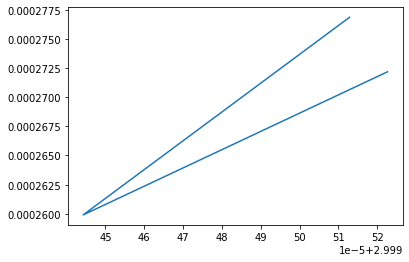

In [117]:
plt.plot(w1_list, l2_list)

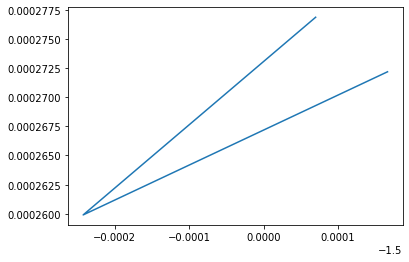

In [118]:
plt.plot(w2_list, l2_list)

concise implementation of linear regression 
- api 사용해보기

In [20]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l


true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [21]:
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [22]:
next(iter(data_iter))

[tensor([[ 1.1156e+00,  3.9359e-01],
         [-3.4439e-01, -3.4643e-01],
         [-4.7308e-01, -4.1863e-01],
         [-7.3113e-01, -4.8680e-01],
         [ 1.6410e+00,  2.9349e-01],
         [ 1.7880e+00,  3.3604e+00],
         [ 6.5114e-01,  1.7429e+00],
         [-6.5825e-01, -1.3717e+00],
         [ 5.7081e-01, -2.3030e-01],
         [-1.1414e-01,  3.0716e-01],
         [ 5.8080e-01,  4.2033e-01],
         [-3.0409e-02, -5.8793e-02],
         [-2.7449e+00, -1.1001e+00],
         [-1.5892e+00,  1.0687e-01],
         [ 6.4028e-01,  7.7677e-01],
         [-1.0091e+00,  6.7693e-01],
         [ 1.1126e+00, -2.9533e-01],
         [-2.1653e-03, -7.0944e-01],
         [-2.2811e+00, -1.4610e+00],
         [-1.3004e+00, -1.3426e+00]]), tensor([[ 8.2491],
         [ 4.9806],
         [ 4.7057],
         [ 4.0420],
         [ 9.9981],
         [ 5.7906],
         [ 4.8280],
         [ 5.5824],
         [ 7.5476],
         [ 4.7099],
         [ 6.6189],
         [ 5.4943],
         [-1.0792],

In [23]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [24]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [25]:
loss = nn.MSELoss()

In [26]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [27]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000327
epoch 2, loss 0.000103
epoch 3, loss 0.000103


In [28]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([0.0004, 0.0003])
error in estimating b: tensor([-0.0003])
